In [1]:
import pandas as pd
import numpy as np
import os
import FinanceDataReader as fdr
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')

매입날짜0102
매도날짜0329
종목코드044340
주식수 :  6 
매입단가 :  14600 원
매입가 :  87600 원
매도단가 :  29300 원
매도가 :  175800 원
수익금액 :  88200 원
수익률 :  100.68 % 
변동률 :  [-2.4, 3.86, 0.68, -2.35, 2.75, -0.33, 3.36, 1.62, -2.24, 4.25, -0.63, 0.95, -0.62, -0.63, 6.01, 0.9, 0.0, 0.0, -2.07, 3.93, -1.74, -0.3, -0.59, -0.3, -0.9, 0.91, -4.19, 1.25, -0.62, -1.24, -0.31, 1.26, -1.56, -0.63, 2.55, -1.86, -0.32, -3.17, 6.23, 0.93, 11.93, -3.28, 8.47, 6.51, 1.47, 4.34, -0.23, 11.34, 1.04, 12.76, 3.83, 10.02, 3.83, -6.46, 3.12, -4.94, 0.5, -2.17]


<AxesSubplot:>

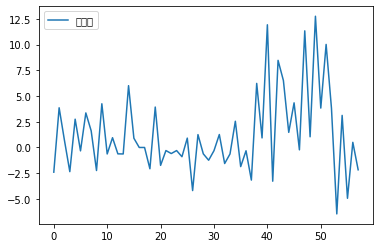

In [3]:
benefit_li=[]

# 가상투자 수익률 함수
def stock(money, stock_code, buy_date, sell_date):
    
    # 2019년도 kospi주가 가져오기
    df_stock = fdr.DataReader(stock_code,'2019','2020')
    df_stock.reset_index(inplace=True)
    df_stock['Date'] = df_stock['Date'].astype(str)
    df_stock['Date'] = df_stock['Date'].apply(lambda x:str(x).replace('-','')[4:8])
    df_stock.set_index('Date', inplace=True)

    # 매입
    buy_closing_price = df_stock.loc[buy_date,'Close']
    buy_num = int(money/buy_closing_price)
    buy_price = buy_closing_price * buy_num

    # 매도
    sell_closing_price = df_stock.loc[sell_date,'Close']
    sell_price = sell_closing_price * buy_num
    margin = sell_price - buy_price

    # 수익률
    benefit = (sell_closing_price/buy_closing_price) * 100 - 100
    
    # 매매기간 일일 수익률
    days = []
    global benefit_li
    benefit_li = []
    
    for i in df_stock.loc[buy_date:sell_date].index:
        days.append(i)

    for i,d in enumerate(days[1:]):
        a = df_stock.loc[days[i], 'Close']
        b = df_stock.loc[d,'Close']

        benefit_day = (b/a) * 100 - 100
        benefit_li.append(round(benefit_day,2))

    benefit_li
    
    
    return print('주식수 : ', buy_num, '\n' '매입단가 : ', buy_closing_price, '원''\n' '매입가 : ', buy_price, '원''\n' 
                 '매도단가 : ', sell_closing_price, '원''\n' '매도가 : ', sell_price, '원''\n' 
                 '수익금액 : ', margin, '원''\n' '수익률 : ', '{:.2f} %'.format(benefit), '\n' '변동률 : ', benefit_li)


# 매입날짜, 매도날짜, 종목코드를 입력받아 함수를 이용해서 수익률 출력
buy_date = input('매입날짜')
sell_date = input('매도날짜')

money = 100000
stock_code = input('종목코드')

stock(money, stock_code, buy_date, sell_date)

# 수익률 그래프화
benefit_daily = pd.DataFrame()
benefit_daily['수익률'] = benefit_li
benefit_daily.plot()